In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

use_sklearn = False

In [2]:
class Naive_Bayes():
    def __init__(self):
        super().__init__()

    def fit(self, X_train, Y_train):
        self.X = X_train
        self.y = Y_train
        self.classes = np.unique(Y_train)
        self.parameters = {}
        for i, c in enumerate(self.classes):
            X_Index_c = self.X[np.where(Y_train == c)]
            X_index_c_mean = np.mean(X_Index_c, axis=0, keepdims=True)
            X_index_c_var = np.var(X_Index_c, axis=0, keepdims=True)
            parameters = {"mean": X_index_c_mean, "var": X_index_c_var, "prior": X_Index_c.shape[0] / self.X.shape[0]}
            self.parameters["class" + str(c)] = parameters

    def predict(self, X_test):
        output = self._predict(X_test)
        output = np.reshape(output, (self.classes.shape[0], X_test.shape[0]))
        prediction = np.argmax(output, axis=0)
        return prediction

    def _predict(self, X_test):
        output = []
        for y in range(self.classes.shape[0]):
            prior = np.log(self.parameters["class" + str(y)]["prior"]) 
            posterior = self._pdf(X_test, y)
            prediction = prior + posterior 
            output.append(prediction)
        return output

    def _pdf(self, _X, classes): 
        eps = 1e-4
        mean = self.parameters["class" + str(classes)]["mean"]
        var = self.parameters["class" + str(classes)]["var"]

        numerator = np.exp(-(_X - mean) ** 2 / (2 * var + eps)) 
        denominator = np.sqrt(2 * np.pi * var + eps)
        result = np.sum(np.log(numerator / denominator), axis=1, keepdims=True)
        return result.T


In [3]:
dataset = pd.read_csv(open('./Social_Network_Ads.csv'))
X = dataset.iloc[:, [2, 3]].values
Y = dataset.iloc[:, 4].values
# X

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)
# X_train
sc = StandardScaler()
X_train = sc.fit_transform(X_train.astype(np.float64))
X_test = sc.transform(X_test.astype(np.float64))
# X_train

In [5]:
if use_sklearn:
    from sklearn.naive_bayes import GaussianNB
    classifier = GaussianNB(priors=None, var_smoothing=1e-09)
    classifier.fit(X_train, Y_train)
else:
    classifier = Naive_Bayes()
    classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
Y_pred 

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

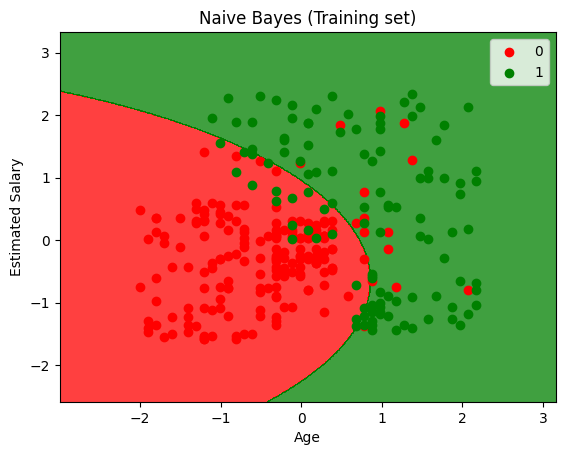

In [6]:
X_set, y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01), np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(('red', 'green'))(i), label = j) 
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()